## Artificial Neural Network - House Price Prediction

Artificial neural network to solve classification problem. To determine if the house price is above the median price or not.


In [ ]:
# Dataset
# https://drive.google.com/file/d/1GfvKA0qznNVknghV4botnNxyH-KvODOC/view

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from sklearn.model_selection import train_test_split

In [2]:
houseprice_df = pd.read_csv('housepricedata.csv')

In [3]:
# check the dimesions of dataset
houseprice_df.shape

(1460, 11)

In [4]:
# View first rows of dataset
houseprice_df.head()

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1


Last column 'AboveMedianPrice' determines if the house is above or below the median price.

In [5]:
# view stats of dataset
houseprice_df.describe()

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,10516.828082,6.099315,5.575342,1057.429452,1.565068,0.382877,2.866438,6.517808,0.613014,472.980137,0.498630
std,9981.264932,1.382997,1.112799,438.705324,0.550916,0.502885,0.815778,1.625393,0.644666,213.804841,0.500169
min,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000
25%,7553.500000,5.000000,5.000000,795.750000,1.000000,0.000000,2.000000,5.000000,0.000000,334.500000,0.000000
50%,9478.500000,6.000000,5.000000,991.500000,2.000000,0.000000,3.000000,6.000000,1.000000,480.000000,0.000000
75%,11601.500000,7.000000,6.000000,1298.250000,2.000000,1.000000,3.000000,7.000000,1.000000,576.000000,1.000000
max,215245.000000,10.000000,9.000000,6110.000000,3.000000,2.000000,8.000000,14.000000,3.000000,1418.000000,1.000000


### Separate the data into features and labels

In [ ]:
# labels: is a result we want (OUTPUT)
# features: the variables we can use to classify the house price (INPUTs)

In [6]:
# Define labels as (y) and features as (x)

y = houseprice_df['AboveMedianPrice']                      # Target variable (label)
x = houseprice_df.drop(columns=['AboveMedianPrice'])       # the remaining 20 variables (features)

In [7]:
# check the first 5 observations of all the features
x[0:5]

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea
0,8450,7,5,856,2,1,3,8,0,548
1,9600,6,8,1262,2,0,3,6,1,460
2,11250,7,5,920,2,1,3,6,1,608
3,9550,7,5,756,1,0,3,7,1,642
4,14260,8,5,1145,2,1,4,9,1,836


We can see the above output shows the 10 columns (10 variables for the features)

In [8]:
# check the first 5 observations of the label (y)
y[0:5]

0    1
1    1
2    1
3    0
4    1
Name: AboveMedianPrice, dtype: int64

We can see the output above that the median house price is either 0 or 1. As all of the data is already numerical, we don't need to convert them.

In [9]:
# Converted each row into 'float' values      

y = y.values.astype('float32')
x = x.values.astype('float32')

In [10]:
# check the first 5 observations of the label (y)
y[0:5]

array([1., 1., 1., 0., 1.], dtype=float32)

In [11]:
# check the first 5 observations of all the features (x)
x[0:5]

array([[8.450e+03, 7.000e+00, 5.000e+00, 8.560e+02, 2.000e+00, 1.000e+00,
        3.000e+00, 8.000e+00, 0.000e+00, 5.480e+02],
       [9.600e+03, 6.000e+00, 8.000e+00, 1.262e+03, 2.000e+00, 0.000e+00,
        3.000e+00, 6.000e+00, 1.000e+00, 4.600e+02],
       [1.125e+04, 7.000e+00, 5.000e+00, 9.200e+02, 2.000e+00, 1.000e+00,
        3.000e+00, 6.000e+00, 1.000e+00, 6.080e+02],
       [9.550e+03, 7.000e+00, 5.000e+00, 7.560e+02, 1.000e+00, 0.000e+00,
        3.000e+00, 7.000e+00, 1.000e+00, 6.420e+02],
       [1.426e+04, 8.000e+00, 5.000e+00, 1.145e+03, 2.000e+00, 1.000e+00,
        4.000e+00, 9.000e+00, 1.000e+00, 8.360e+02]], dtype=float32)

### Split data into Train and Test sets

In [ ]:
# Train: to train the model
# Validation: check the overfitting of the model
# Test: check how the model performs

In [12]:
# split the features and labels data (70/30 split)

# Test dataset:

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)   # Training with TEST

In [13]:
# Validation dataset:

x_train, x_validation, y_train, y_validation = train_test_split(x_train, y_train, test_size = 0.3)   # Training with VALIDATION

## Create Model

### Model 1

In [14]:
# Using keras sequential model. 
# choose number of layers to add to model, and what type of activation function you want for each layer.
model_1 = keras.Sequential([keras.layers.Dense(64, input_shape = (10,)),    # Input layer: 64 nodes, (10 feature columns)
                          keras.layers.Dense(12, activation = tf.nn.relu),  # Hidden layer: activation used: tensorflow rectified linear unit
                          keras.layers.Dense(2, activation = 'softmax')])   # Output layer: 2 nodes at output (above or below median price). activation used: softmax

In [15]:
# Compile model
model_1.compile(optimizer = 'adam',                     # adam optimisation for model                   
             loss = 'sparse_categorical_crossentropy',  # loss function: what aspect we want to minimise as model progresses
             metrics = ['acc'])                         # we want to analyse accuracy metric

In [16]:
# Fit data to model
fit_1 = model_1.fit(x_train, y_train, epochs=25, validation_data=(x_validation, y_validation))  # epochs: how many times we want to repeat training

Epoch 1/25
23/23 [==============================] - 2s 51ms/step - loss: 197.6770 - acc: 0.5011 - val_loss: 64.2645 - val_acc: 0.5472
Epoch 2/25
23/23 [==============================] - 0s 5ms/step - loss: 62.5636 - acc: 0.5165 - val_loss: 23.9938 - val_acc: 0.5765
Epoch 3/25
23/23 [==============================] - 0s 5ms/step - loss: 26.3654 - acc: 0.5599 - val_loss: 16.6589 - val_acc: 0.5896
Epoch 4/25
23/23 [==============================] - 0s 4ms/step - loss: 26.9321 - acc: 0.5353 - val_loss: 11.8771 - val_acc: 0.5147
Epoch 5/25
23/23 [==============================] - 0s 5ms/step - loss: 22.3794 - acc: 0.5147 - val_loss: 28.4547 - val_acc: 0.4853
Epoch 6/25
23/23 [==============================] - 0s 4ms/step - loss: 24.2699 - acc: 0.5327 - val_loss: 6.1507 - val_acc: 0.5993
Epoch 7/25
23/23 [==============================] - 0s 5ms/step - loss: 13.5016 - acc: 0.5597 - val_loss: 10.6790 - val_acc: 0.5049
Epoch 8/25
23/23 [==============================] - 0s 5ms/step - loss: 15.

In [17]:
# Test model on TEST dataset:

prediction_features = model_1.predict(x_test)     # Appplying the model on the features 
performance = model_1.evaluate(x_test, y_test)    # check performance based on the TEST features and TEST labels 
print(performance)

14/14 [==============================] - 0s 1ms/step - loss: 17.6290 - acc: 0.5000
[17.628978729248047, 0.5]


From looking at the results of testing the model on the TEST dataset, we can see that we get an accuracy of 50%

### Validation 

In [18]:
# Test overfitting of the model, by looking at validation
fit_1_dict = fit_1.history
fit_1_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

In [19]:
# check overfitting
acc = fit_1_dict['acc']             # accuracy
val_acc = fit_1_dict['val_acc']     # validation accuracy
loss = fit_1_dict['loss']           # loss
val_loss = fit_1_dict['val_loss']   # validation loss   

runs = range(1, len(acc)+1)         #  range: start, stop

In [20]:
# Check range of runs
runs

range(1, 26)

This confirms that there are 25 runs of the model.

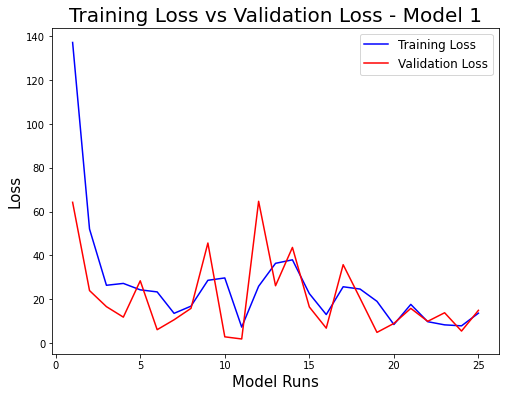

In [21]:
# plot
plt.figure(figsize = (8,6))
plt.plot(runs, loss, 'b', label='Training Loss')          

plt.plot(runs, val_loss, 'r', label='Validation Loss')
plt.title('Training Loss vs Validation Loss - Model 1', fontsize=20)
plt.xlabel('Model Runs', fontsize=15)                                         
plt.ylabel('Loss', fontsize=15)
plt.legend(fontsize=12)

From the plot we can see that the more runs of the model are performed, the training loss and validation loss decreases. There does not appear to be any large divergence between the two. 